In [150]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import math

img = cv.imread("src/files/snippets/pic_1.png")
mpl.rcParams["figure.dpi"] = 120


In [ ]:
for i in range(0, 213):
    img = cv.imread(f"src/files/snippets/pic_{i}.png")
    mpl.rcParams["figure.dpi"] = 120

    plt.subplot(2, 1, 1)
    _ = sns.histplot(x=img.ravel())

    plt.subplot(2, 1, 2)
    plt.imshow(img)

    plt.show()



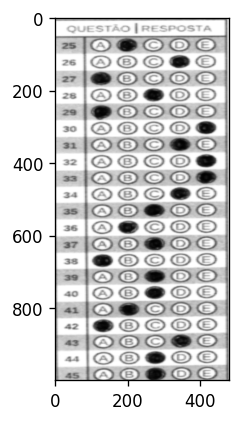

In [151]:
img_warp_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_warp_gray, cmap="gray")

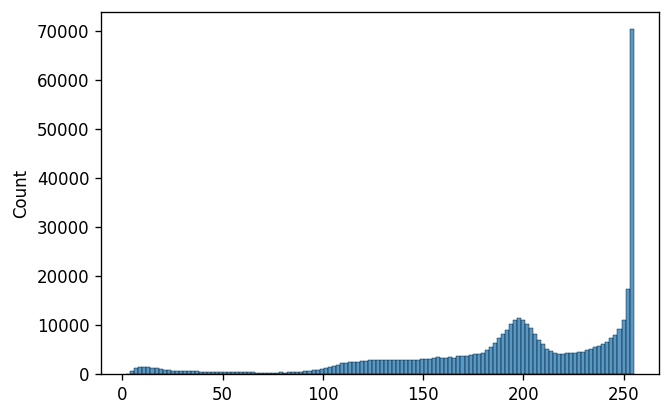

In [152]:
_ = sns.histplot(x=img_warp_gray.ravel())
plt.show()

In [144]:
img_df = pd.DataFrame({"img": img_warp_gray.ravel()})
img_filtered = img_df[(img_df["img"] > 50) & (img_df["img"] < 200)]


In [145]:
def get_bucket(value: int):
    i_divided = value / 50
    i_ceiled = math.ceil(i_divided)
    
    return i_ceiled

img_filtered["buckets"] = img_filtered["img"].apply(get_bucket)
img_filtered

/tmp/ipykernel_1075595/3092238590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_filtered["buckets"] = img_filtered["img"].apply(get_bucket)


,img,buckets
0,150,3
1,150,3
2,151,4
3,152,4
4,166,4
...,...,...
479995,170,4
479996,175,4
479997,171,4
479998,163,4


In [146]:
img_filtered.groupby(["buckets"])["img"].agg([len])

,len
buckets,
2,51808
3,48842
4,70113


In [147]:
def get_bucket(value: int):
    i_divided = value / 0.005
    i_ceiled = math.ceil(i_divided)
    
    return i_ceiled

img_filtered["buckets"] = img_filtered["img"].apply(get_bucket)
img_filtered

/tmp/ipykernel_1075595/2733961649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_filtered["buckets"] = img_filtered["img"].apply(get_bucket)


,img,buckets
0,150,30000
1,150,30000
2,151,30200
3,152,30400
4,166,33200
...,...,...
479995,170,34000
479996,175,35000
479997,171,34200
479998,163,32600


In [148]:
summary_df = img_filtered.groupby(["buckets"])["img"].agg([np.mean, np.median, len]).reset_index()
summary_df_sorted = summary_df.sort_values(["buckets"])
summary_df_sorted["len_lagged"] = summary_df_sorted["len"].shift(1)
summary_df_sorted["len_acceleration"] = abs(summary_df_sorted["len"] - summary_df_sorted["len_lagged"])

In [149]:
summary_df_sorted[(summary_df_sorted["mean"] < 150) & (summary_df_sorted["mean"] > 100)].sort_values(["len_acceleration"], ascending=False)

,buckets,mean,median,len,len_lagged,len_acceleration
96,29400,147.0,147.0,1128,1026.0,102.0
91,28400,142.0,142.0,1035,960.0,75.0
83,26800,134.0,134.0,993,929.0,64.0
56,21400,107.0,107.0,970,907.0,63.0
97,29600,148.0,148.0,1075,1128.0,53.0
73,24800,124.0,124.0,959,906.0,53.0
65,23200,116.0,116.0,925,977.0,52.0
90,28200,141.0,141.0,960,1012.0,52.0
70,24200,121.0,121.0,987,935.0,52.0
58,21800,109.0,109.0,959,1007.0,48.0


In [105]:
38000*0.005

190.0

In [59]:
255 / 0.005

51000.0

In [63]:
400 * 0.005

2.0

In [54]:
np.size(img)

1440000